In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk_preprocessing
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics
import sklearn.model_selection as sk_model_selection

from pprint import pprint
from typing import List
%matplotlib inline

In [2]:
""" servise functions """
def train_linear_model(X, y):
    linear_regression = sk_linear_models.LinearRegression()
    linear_regression.fit(X, y)
    return linear_regression


def get_MSE(model, X, y_true):
    y_predicted = model.predict(X)
    MSE = sk_metrics.mean_squared_error(y_true, y_predicted)
    return MSE

In [3]:
""" using different datasets """

df = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/muscle_mass.csv')
X, y = df[["training_time"]], df[["muscle_mass"]]

# df = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/advertising.csv')
# X, y = df[["TV"]], df[["sales"]]

In [4]:
def test_model(polynom_max: int) -> List[int]:
    """ iterate through polynom_max degrees and measure it's MSE """

    test_MSE_iterations = []

    for i in range(polynom_max):
        polynomial_transformer = sk_preprocessing.PolynomialFeatures(degree=i)
        X_transformed = polynomial_transformer.fit_transform(X)

        X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(
            X_transformed, y, shuffle=True)  # cross validation
        
        model = train_linear_model(X_train, y_train)

        test_MSE_iterations.append(get_MSE(model, X_test, y_test))
    return test_MSE_iterations

## Search for the best polynomial regression curve.

Compute mean of 100 tests of 1-20 range polinomial regressions

There are flactuations in some combinations, that's why i use mean of several calculations

In [5]:
%%time

polynom_max = 20
multiple_model_tests = []

for i in range(100):
    multiple_model_tests.append(test_model(polynom_max))

arrays = [np.array(x) for x in multiple_model_tests]
model_tests = [np.mean(k) for k in zip(*arrays)]

CPU times: user 10.4 s, sys: 57.9 ms, total: 10.5 s
Wall time: 11.1 s


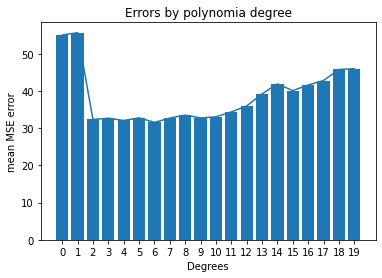

In [6]:
""" print plot """

fig, ax = plt.subplots()
polynom_range = list(range(polynom_max))
labels = list(map(str, polynom_range))

ax.set_title('Errors by polynomia degree')

ax.bar(polynom_range, model_tests)
ax.plot(polynom_range, model_tests)

ax.set_ylabel('mean MSE error')
ax.set_xlabel('Degrees')
ax.set_xticks(polynom_range)
ax.set_xticklabels(labels)

plt.show()

In [ ]:
### Conclusions

After 2nd degree there is no visible decreese in MSE, so there is no sence making model more complicated, that's why the best polynomia degree is 2